In [40]:
!pip install scikit-fuzzy

In [41]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Criando o Antecedente ( Input )

In [71]:
velocidade = ctrl.Antecedent(np.arange(0, 181), "velocidade")
massa = ctrl.Antecedent(np.arange(0, 2401), "massa")

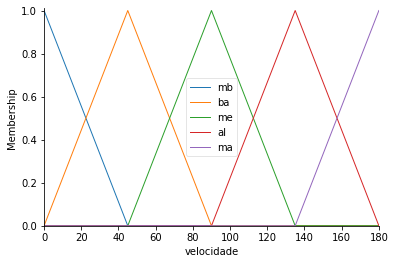

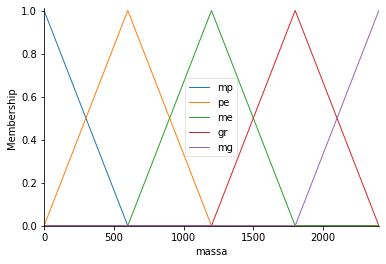

In [72]:
# 3, 5 ou 7
velocidade.automf(5, names=["mb", "ba", "me", "al", "ma"])

massa["mp"] = fuzz.trimf(massa.universe, [0,  0, 600])
massa["pe"] = fuzz.trimf(massa.universe, [0, 600, 1200])
massa["me"] = fuzz.trimf(massa.universe, [600, 1200, 1800])
massa["gr"] = fuzz.trimf(massa.universe, [1200, 1800, 2400])
massa["mg"] = fuzz.trimf(massa.universe, [1800, 2400, 2400])

velocidade.view()
massa.view()

# Criando o Consequente ( Output ) 

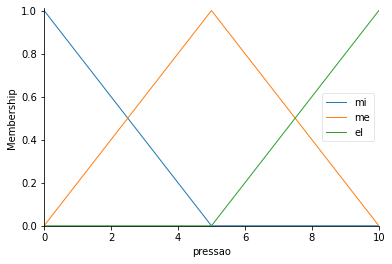

In [73]:
pressao = ctrl.Consequent(np.arange(0, 11), "pressao")
pressao["mi"] = fuzz.trimf(pressao.universe, [0, 0, 5])
pressao["me"] = fuzz.trimf(pressao.universe, [0, 5, 10])
pressao["el"] = fuzz.trimf(pressao.universe, [5, 10, 10])
pressao.view()

# Criando base de regras

In [74]:
regra1 = ctrl.Rule(velocidade["mb"] | massa["mp"], pressao["mi"])
regra2 = ctrl.Rule(velocidade["mb"] | massa["pe"], pressao["mi"])
regra3 = ctrl.Rule(velocidade["mb"] | massa["me"], pressao["mi"])
regra4 = ctrl.Rule(velocidade["ba"] | massa["mp"], pressao["mi"])
regra5 = ctrl.Rule(velocidade["ba"] | massa["pe"], pressao["mi"])
regra6 = ctrl.Rule(velocidade["ba"] | massa["me"], pressao["mi"])
regra7 = ctrl.Rule(velocidade["me"] | massa["mp"], pressao["mi"])
regra8 = ctrl.Rule(velocidade["me"] | massa["pe"], pressao["mi"])
regra9 = ctrl.Rule(velocidade["mb"] | massa["gr"], pressao["me"])
regra10 = ctrl.Rule(velocidade["mb"] | massa["mg"], pressao["me"])
regra11 = ctrl.Rule(velocidade["ba"] | massa["gr"], pressao["me"])
regra12 = ctrl.Rule(velocidade["ba"] | massa["mg"], pressao["me"])
regra13 = ctrl.Rule(velocidade["me"] | massa["me"], pressao["me"])
regra14 = ctrl.Rule(velocidade["al"] | massa["mp"], pressao["me"])
regra15 = ctrl.Rule(velocidade["al"] | massa["pe"], pressao["me"])
regra16 = ctrl.Rule(velocidade["al"] | massa["me"], pressao["me"])
regra17 = ctrl.Rule(velocidade["ma"] | massa["mp"], pressao["me"])
regra18 = ctrl.Rule(velocidade["ma"] | massa["pe"], pressao["me"])
regra19 = ctrl.Rule(velocidade["ma"] | massa["me"], pressao["me"])
regra20 = ctrl.Rule(velocidade["me"] | massa["gr"], pressao["el"])
regra21 = ctrl.Rule(velocidade["me"] | massa["mg"], pressao["el"])
regra22 = ctrl.Rule(velocidade["al"] | massa["gr"], pressao["el"])
regra23 = ctrl.Rule(velocidade["al"] | massa["mg"], pressao["el"])
regra24 = ctrl.Rule(velocidade["ma"] | massa["gr"], pressao["el"])
regra25 = ctrl.Rule(velocidade["ma"] | massa["mg"], pressao["el"])


# Criando o Sistema Fuzzy

In [75]:
resposta_ctrl = ctrl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6,
                                    regra7,regra8,regra9,regra10,regra11,regra12,
                                    regra13,regra14,regra15,regra16,regra17,regra18,
                                    regra19,regra20,regra21,regra22,regra23,regra24,
                                    regra25])
resposta = ctrl.ControlSystemSimulation(resposta_ctrl)

# Testar valores

In [76]:
resposta.input["velocidade"] = 155
resposta.input["massa"] = 1500

resposta.compute()

In [77]:
print(resposta.output["pressao"])

5.099725260210284


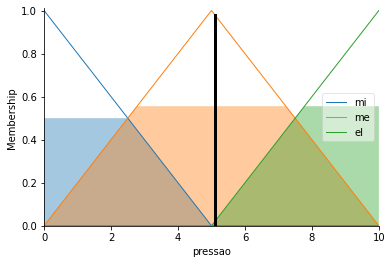

In [78]:
pressao.view(sim=resposta)